In [ ]:
! pip install numpy matplotlib scipy pydub
%cd /kaggle/working
%cp /kaggle/input/ganjoor-roomi-767/audio.mp3 .


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pydub import AudioSegment
from scipy.signal import spectrogram

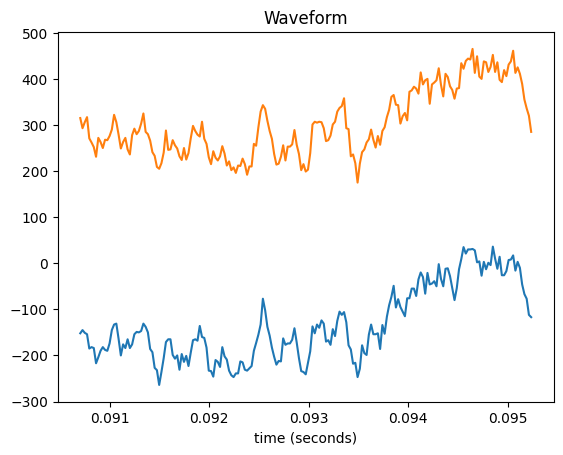

In [34]:
# Convert mp3 to wav using pydub
audio = AudioSegment.from_mp3('audio.mp3')
audio.export("audio.wav", format="wav")

# Define the name of the new WAV audio file
filename = 'audio.wav'

# Define the input range
input_range = np.arange(4000, 4201)

# Read the WAV audio file within the specified range
Fs, Y = wavfile.read(filename)
Y = Y[input_range]

# Convert sample number to time vector
time_axis = input_range / Fs

# Plot the waveform
plt.plot(time_axis, Y)
plt.xlabel('time (seconds)')
plt.title('Waveform')
plt.show()


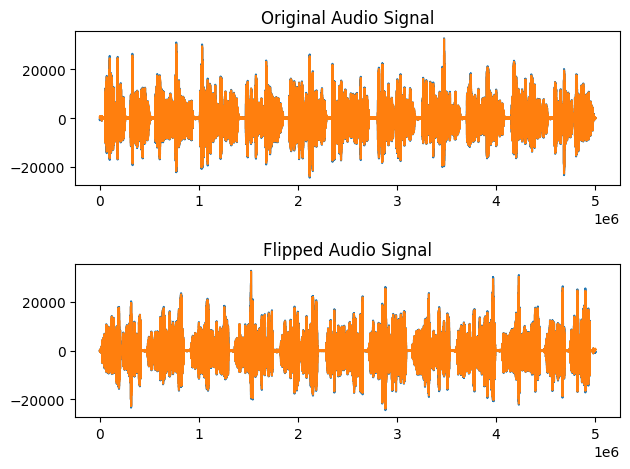

In [33]:
# Load the previously exported 'audio.wav' file
filename = 'audio.wav'
Fs, y = wavfile.read(filename)

# Flip the audio data upside down (reverse the signal)
y2 = np.flipud(y)

# Plot the original signal
plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('Original Audio Signal')

# Plot the flipped (reversed) signal
plt.subplot(2, 1, 2)
plt.plot(y2)
plt.title('Flipped Audio Signal')

# Show the plot
plt.tight_layout()
plt.show()


Number of samples in the audio signal: 5002240
Sample rate (Fs): 44100 Hz
Duration of the audio signal: 113.43 seconds


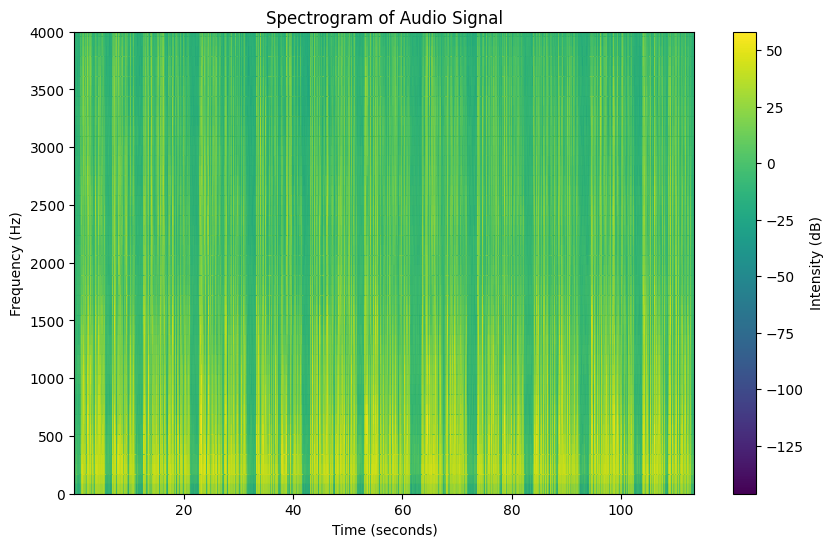

In [32]:
# Load the previously exported 'audio.wav' file
filename = 'audio.wav'
Fs, y = wavfile.read(filename)

# Check the length of the audio signal
num_samples = len(y)
print(f"Number of samples in the audio signal: {num_samples}")
print(f"Sample rate (Fs): {Fs} Hz")

# Calculate duration
duration = num_samples / Fs
print(f"Duration of the audio signal: {duration:.2f} seconds")

# Convert to mono by averaging the channels
if y.ndim == 2:
    y_mono = y.mean(axis=1)
else:
    y_mono = y

# Create the spectrogram
frequencies, times, Sxx = spectrogram(y_mono, fs=Fs)
# Replace zeros in Sxx to avoid log10 issues
Sxx = np.where(Sxx == 0, np.finfo(float).eps, Sxx)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title('Spectrogram of Audio Signal')
plt.ylim(0, 4000)  # Limit y-axis to 4000 Hz for better visibility
plt.show()
